In [51]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime

In [4]:
# Reading the dataset of hospital
df = pd.read_csv("C:/Users/ammar.aamir/Documents/Assignment 2 (Python & R)/hospitaldata.csv")

In [5]:
# Question 1. Remove dots from column headers
cols = list(df.columns)
for i in range(0,len(cols)):
    cols[i] = cols[i].replace(".","")
cols
df.columns = cols
df.columns

Index(['Date', 'id', 'Time', 'Age', 'Sex', 'ConsultingDoctor', 'Specialty',
       'Procedure', 'TotalCharges', 'AmountReceived', 'AmountBalance',
       'AmountReceivedBy', 'AmountinHospital', 'ReceptionistName', 'NextApt'],
      dtype='object')

In [6]:
# Question 2. Which day of the week is expected to have most visits? 
# Counter shows Monday is the day with most visits, i.e. 51.
days = []
for i in range(0,len(df.Date) - 1):
    days.append(df.Date[i].split(",")[0])
Counter(days)

Counter({'Friday': 25,
         'Monday': 51,
         'Saturday': 20,
         'Sunday': 7,
         'Thursday': 33,
         'Tuesday': 42,
         'Wednesday': 43})

In [7]:
# Question 3. What is the average age of patients?
# By removing "M" and replacing "nan","-" with 0, we get 28.4 as the average age of patient
#age = df.dropna(subset=["Age"])
age = list(df.Age)
fage = []
for i in range(0,len(age)):
    age[i] = str(age[i]).replace("nan", "0")
    age[i] = str(age[i]).replace("M", "")
    age[i] = str(age[i]).replace("-", "0")
    age[i] = float(age[i])
np.mean(age)

28.463963963963963

In [8]:
# Question 4. How many children were entertained? (Make a Bracket of Age from 1-12) 
# 24 children were entertained.
children = 0
for i in range(0,len(age)):
    if age[i] <= 12 and age[i] > 0:
        children += 1
children

24

For Male:


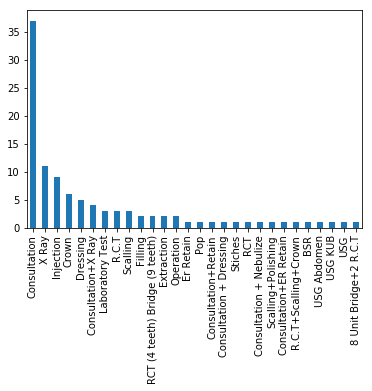

For Female:


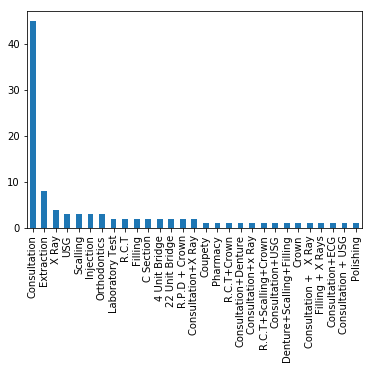

In [9]:
# Question 5. Which gender type had what kind of procedure in abundance?
# first plot shows Consultation is the highest procedure count for Male
# second plot shows Consultation is the highest procedure count for female too.
print("For Male:")
df[df["Sex"]=="M"].Procedure.value_counts().plot(kind='bar')
plt.show()
print("For Female:")
df[df["Sex"]=="F"].Procedure.value_counts().plot(kind='bar')
plt.show()

In [10]:
#Question 6. Which Doctor is earning highest?
# First we obtain a list of unique doctors then extracting the list of total charges of each doctor. 
# Finally taking sum of each in a list. Taking max from the list gives us the answer i.e. 'Dr Alaf Khan'
doc = df.ConsultingDoctor.unique()
doc = list(doc)
money = []
for d in doc:
    doc1 = df[df["ConsultingDoctor"] == d].TotalCharges
    doc1 = list(doc1)
    for i in range(0,len(doc1)):
        doc1[i] = str(doc1[i]).replace("nan", "0")
        doc1[i] = str(doc1[i]).replace("Cancelled", "0")
        doc1[i] = float(doc1[i])
    money.append(sum(doc1))
doc[money.index(max(money))]

'Dr Alaf Khan'

In [30]:
# Question 7. Which procedure type earns more money? 
# Following the steps of last question, the procdure type which earns most money is "Orthodontics"
proc = df.Procedure.unique()
total = []
proc = list(proc)
for p in proc:
    procMoney = df[df["Procedure"] == p].TotalCharges
    procMoney = list(procMoney)
    for i in range(0,len(procMoney)):
        procMoney[i] = str(procMoney[i]).replace("nan", "0")
        procMoney[i] = str(procMoney[i]).replace("Cancelled", "0")
        procMoney[i] = float(procMoney[i])
    total.append(sum(procMoney))
proc[total.index(max(total))]

'Orthodontics'

In [69]:
# Question 8. Which time of the day has highest frequency of visits by hour? 
# This line of code counts the frequency of each unique time the dataset has. It gives 29 as the highest frquency
# which means 13:00 is the most busiest hour of the day.
d = pd.to_datetime(df["Time"], errors= 'coerce')
d.dt.hour.value_counts()

13.0    29
18.0    23
15.0    20
14.0    20
12.0    20
17.0    16
16.0    15
19.0    14
11.0    10
20.0     8
10.0     6
21.0     5
22.0     4
9.0      2
23.0     2
Name: Time, dtype: int64

In [101]:
#9. Create a bracket of time by Morning, Afternoon, Evening, Night (6am – 12pm – Morning, 12 pm- 4 pm, 
# Afternoon, 4 pm- 7pm, Evening, 7pm – 6am, Night).
# Because the time was in 24hour format I converted time according to it and also the last condition was changed due to
# the 24hours format.
daytime = []
for i in range(0,len(df.Time)):
    if d.dt.hour[i] >= 6.0 and d.dt.hour[i] <= 12.0:
        daytime.insert(i,"Morning")
    elif d.dt.hour[i] > 12.0 and d.dt.hour[i] <= 16.0:
        daytime.insert(i,"Afternoon");
    elif d.dt.hour[i] > 16.0 and d.dt.hour[i] <= 19.0:
        daytime.insert(i,"Evening");
    elif d.dt.hour[i] > 19.0:
        daytime.insert(i,"Night");
    else:
        daytime.insert(i,"NaT")
df.daytime = daytime
df.daytime

0        Morning
1        Morning
2        Morning
3      Afternoon
4      Afternoon
5      Afternoon
6      Afternoon
7      Afternoon
8      Afternoon
9        Evening
10       Evening
11       Evening
12     Afternoon
13     Afternoon
14       Evening
15         Night
16       Morning
17         Night
18         Night
19       Morning
20     Afternoon
21     Afternoon
22       Morning
23     Afternoon
24     Afternoon
25           NaT
26         Night
27           NaT
28       Morning
29     Afternoon
         ...    
192      Morning
193      Morning
194    Afternoon
195    Afternoon
196      Evening
197    Afternoon
198          NaT
199    Afternoon
200      Evening
201      Evening
202          NaT
203    Afternoon
204          NaT
205      Evening
206    Afternoon
207        Night
208        Night
209        Night
210    Afternoon
211      Evening
212      Morning
213      Evening
214      Morning
215      Morning
216          NaT
217          NaT
218    Afternoon
219      Eveni

In [133]:
# Question 10. How many patients are repeated visitors?
# 37 patients are repeated visitors.
vis = df.id.value_counts()
vis = vis[vis > 1]
len(vis)

1      12
46      5
122     5
140     4
94      4
17      4
45      3
101     3
63      3
132     3
114     3
109     3
107     3
145     3
20      2
97      2
59      2
88      2
96      2
112     2
116     2
118     2
25      2
80      2
120     2
40      2
100     2
64      2
4       2
133     2
12      2
13      2
150     2
149     2
151     2
130     2
153     2
Name: id, dtype: int64

In [137]:
# Question 11. Give us the id of repeated visitors. 
rId = list(vis.index)
rId

[1,
 46,
 122,
 140,
 94,
 17,
 45,
 101,
 63,
 132,
 114,
 109,
 107,
 145,
 20,
 97,
 59,
 88,
 96,
 112,
 116,
 118,
 25,
 80,
 120,
 40,
 100,
 64,
 4,
 133,
 12,
 13,
 150,
 149,
 151,
 130,
 153]

In [158]:
# Question 12. Which patients visited again for the same problem? 
# Group by id and procedure and selecting only values which are greater than 1
pt = df.groupby(["id","Procedure"]).size()
pt = pt[pt>1]
pt

id   Procedure                     
1    Pharmacy                          10
12   22 Unit Bridge                     2
13   Consultation                       2
17   Consultation                       2
     RCT (4 teeth) Bridge (9 teeth)     2
20   Consultation                       2
25   Consultation                       2
45   R.P.D + Crown                      2
46   Dressing                           4
63   Consultation                       2
80   Consultation                       2
94   Injection                          3
97   Consultation                       2
101  C Section                          2
109  R.C.T                              2
112  Operation                          2
114  Consultation                       3
116  X Ray                              2
122  Injection                          5
130  Consultation                       2
140  4 Unit Bridge                      2
145  Crown                              3
151  R.C.T+Scalling+Crown               